# World Happiness report 2019

Let's take a look at the 2019 World Happiness Report, which assessed happiness in 157 countries. Create several visualizations to explore the data provided. It also clusters countries using a few simple clustering algorithm



The dataset in this report is courtesy of Kaggle.com, but the actual data has been collected by the Gallup World Poll and published to http://worldhappiness.report/ by independent experts. My analysis is focusing on what factors create the happiest places in the world, and whether or not happiness is simply a state of mind, or something caused by outside factors.

## Questions
1. There are 7 factors that lead to each country’s happiness score. Does a high score in happiness correlate to high scores across the board, or are there any correlations among the 7 factors?


2. Do the richest (respectively) countries correlate to being the happiest, or are there other factors that rank highly among the ‘happiest’ countries?








## METHODS AND PHILOSOPHY
The rankings of national happiness are based on a Cantril ladder survey. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The report correlates the results with various life factors. In the reports, experts in fields including economics, psychology, survey analysis, and national statistics, describe how measurements of well-being can be used effectively to assess the progress of nations, and other topics. Each report is organized by chapters that delve deeper into issues relating to happiness, including mental illness, the objective benefits of happiness, the importance of ethics, policy implications, and links with the Organisation for Economic Co-operation and Development's (OECD) approach to measuring subjective well-being and other international and national efforts.

# Meaning of dataset from Kaggle

- GDP per capita:GDP per capita is a measure of a country's economic output that accounts for its number of people.
- Social support:Social support means having friends and other people, including family, to turn to in times of need or crisis to give you a broader focus and positive self-image. Social support enhances quality of life and provides a buffer against adverse life events.
- Healthy life expectancy:Healthy Life Expectancy is the average number of years that a newborn can expect to live in "full health"—in other words, not hampered by disabling illnesses or injuries.
- Freedom to make life choices:Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.
- Generosity:the quality of being kind and generous.
- Perceptions of corruption:The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995 which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.

In [1]:

#Call required libraries

!pip install umap-learn
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from matplotlib.patches import Rectangle
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size
from sklearn import datasets, metrics
from scipy.spatial.distance import cdist 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import umap
from sklearn.mixture import GaussianMixture
RS = 404 # Random state/seed
pd.set_option("display.max_columns",30) # Increase columns shown

# Import Data

In [2]:
#Load world happiness data for year 2019
df_2019=pd.read_csv('2019.csv')

In [3]:
#Print first 5 rows of the dataset
df_2019.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
#Print info of data
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


From these summary statistics, we can see that 5 out of the top 5 happiest countries are located in the Europe region. The point differential between the 25th percentile and lowest happiness score is 1.69, while the difference between the 75th percentile and top score is only 1.34. So there seems to be a greater correlation between the happiest countries, and I intend to explore some of those similarities and differences.

In [6]:
df_2019.nunique()

Overall rank                    156
Country or region               156
Score                           155
GDP per capita                  146
Social support                  145
Healthy life expectancy         119
Freedom to make life choices    130
Generosity                      118
Perceptions of corruption       113
dtype: int64

In [7]:
#Print number of countries present in the data
df_2019['Country or region'].nunique()

156

In [8]:
df_2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## The Happiest Country in the World

-Let's first take a look at the happiest country based on 'Score' according to the data.

In [9]:
df_2019.loc[df_2019['Score'].idxmax()]


Overall rank                          1
Country or region               Finland
Score                             7.769
GDP per capita                     1.34
Social support                    1.587
Healthy life expectancy           0.986
Freedom to make life choices      0.596
Generosity                        0.153
Perceptions of corruption         0.393
Name: 0, dtype: object

In [10]:
# Let's highlight the maximum values of each attribute in the data set
#sort 

def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]
 
df_2019.style.apply(highlight_max)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000


In [11]:
# checking out the shape of our dataset

df_2019.shape

(156, 9)

- Finland is the happiest place on earth!

In [12]:
df_2019.loc[df_2019['Score'].idxmin()]

Overall rank                            156
Country or region               South Sudan
Score                                 2.853
GDP per capita                        0.306
Social support                        0.575
Healthy life expectancy               0.295
Freedom to make life choices           0.01
Generosity                            0.202
Perceptions of corruption             0.091
Name: 155, dtype: object

In [13]:
# Let's highlight the maximum values of each attribute in the data set

def highlight_min(s):    
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]
 
df_2019.style.apply(highlight_min)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000


## EDA



- We got a heat map of the correlation between the variables. A light shade indicates a high correlation. The happiness score shows a high correlation with GDP per capita, family and life expectancy. It has minimal correlation with generosity.

- The ‘Score’ variable is the Happiness Score. One of the things we would like to understand is how other variables relate to the Score, and how strongly X variables are correlated to the Score. To find that out, we will also use a heatmap. 

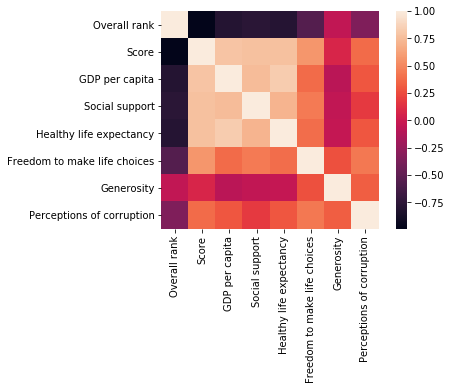

In [14]:
# Let's find out that properties that are highly correlated to each other through heat maps.
corrmat=df_2019.corr()
f,ax=plt.subplots()
sns.heatmap(corrmat, square=True)

### Examining question 1

#### Does a high happiness score correlate to happiness across all criteria?


This heat map shows there are strong correlations between GDP per Capita, Family, and Life Expectancy, both amongst those three and comparing those three to happiness score.

### Important plots to understand the correlation between columns

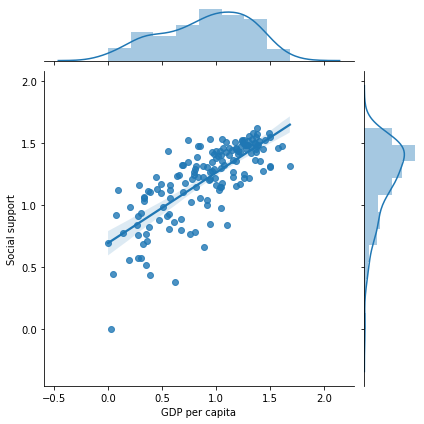

In [15]:
sns.jointplot(x='GDP per capita', y='Social support', kind='reg', data=df_2019)

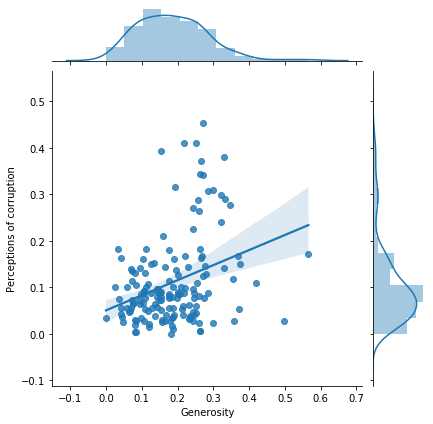

In [16]:
sns.jointplot(x='Generosity', y='Perceptions of corruption', kind='reg', data=df_2019)

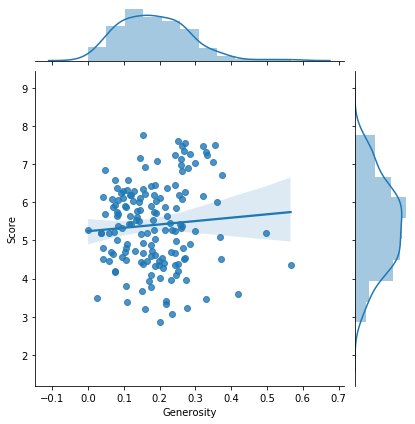

In [17]:

sns.jointplot(x='Generosity', y='Score', kind='reg', data=df_2019)

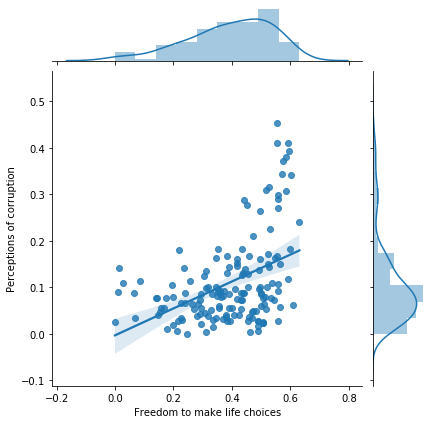

In [18]:

sns.jointplot(x='Freedom to make life choices', y='Perceptions of corruption', kind='reg', data=df_2019)

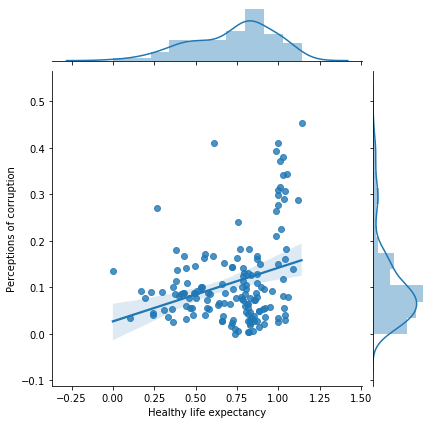

In [19]:
sns.jointplot(x='Healthy life expectancy', y='Perceptions of corruption', kind='reg', data=df_2019)

- As we can see clearly when a country has a bigger GDP the social support is bigger too.

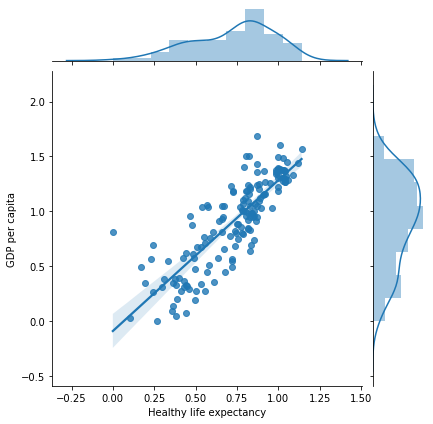

In [20]:
sns.jointplot(x= 'Healthy life expectancy'   , y='GDP per capita', kind='reg', data=df_2019)

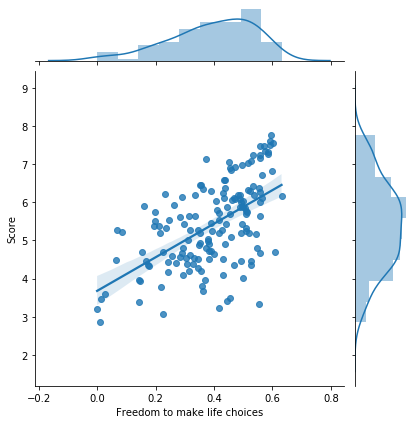

In [21]:
sns.jointplot(x='Freedom to make life choices', y='Score', kind='reg', data=df_2019)


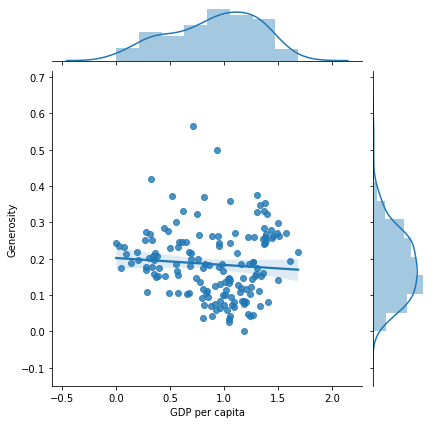

In [22]:
sns.jointplot(x='GDP per capita', y='Generosity', kind='reg', data=df_2019)

- There is no relationship between GDP and Generosity. Actually, the data has a plateau that goes down as the GDP increase.

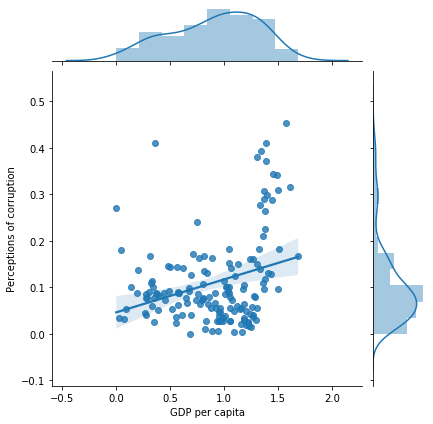

In [23]:
sns.jointplot(x='GDP per capita', y='Perceptions of corruption', kind='reg', data=df_2019)


- There is a clear increase in the perception of corruption when the GDP increase. The use of the line is just for a rapid view, but the points has a fast increase after GDP=1.25 (as an exponential function).

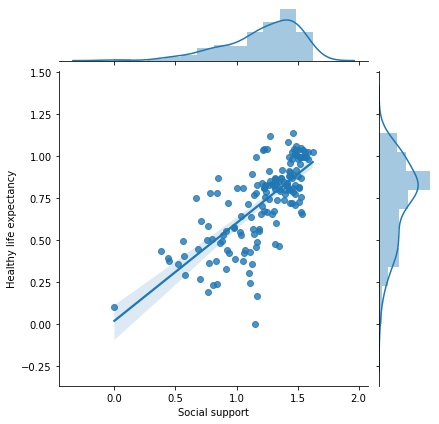

In [24]:
sns.jointplot(x='Social support', y='Healthy life expectancy', kind='reg', data=df_2019)

- In a similar manner as the social support plot, there is a clear correlation between GDP per capita and Healthy life expectancy. When the GDP increases the Healthy life expectancy increases.

In [25]:

def plot_hist_2019(column):
    perc_25_colour = 'gold'
    perc_50_colour = 'mediumaquamarine'
    perc_75_colour = 'deepskyblue'
    perc_95_colour = 'peachpuff'
    
    fig, ax = plt.subplots(figsize=(8,8))
    counts,bins,patches=ax.hist(df_2019[column],facecolor=perc_50_colour,edgecolor='gray')
    ax.set_xticks(bins.round(2))
    plt.xticks(rotation=70)
    twentyfifth, seventyfifth, ninetyfifth = np.percentile(df_2019[column], [25, 75, 95])
    for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
        if rightside < twentyfifth:
            patch.set_facecolor(perc_25_colour)
        elif leftside > ninetyfifth:
            patch.set_facecolor(perc_95_colour)
        elif leftside > seventyfifth:
            patch.set_facecolor(perc_75_colour)
    bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
    bin_y_centers = ax.get_yticks()[1] * 0.25
    for i in range(len(bins)-1):
        bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
        plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')
        
    ax.annotate('Each bar shows count and percentage of total',
            xy=(.85,.30), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=10, bbox=dict(boxstyle="round", fc="white"),
            rotation=-90)

    handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
    labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
    plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))
    plt.axvline(df_2019[column].mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(df_2019[column].mean()*1.2, max_ylim*0.9, 'Mean: {:.2f}'.format(df_2019[column].mean()))
    plt.xlabel(column,fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    
    

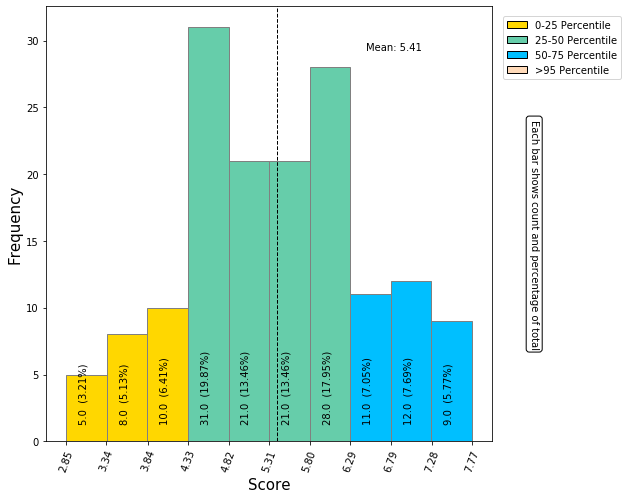

In [26]:
plot_hist_2019('Score')

In [27]:
df_2019[df_2019['Score'] < 4.33]['Country or region']

133                    Ethiopia
134                   Swaziland
135                      Uganda
136                       Egypt
137                      Zambia
138                        Togo
139                       India
140                     Liberia
141                     Comoros
142                  Madagascar
143                     Lesotho
144                     Burundi
145                    Zimbabwe
146                       Haiti
147                    Botswana
148                       Syria
149                      Malawi
150                       Yemen
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country or region, dtype: object

In [28]:
df_2019[df_2019['Score'] > 7.28]['Country or region']

0        Finland
1        Denmark
2         Norway
3        Iceland
4    Netherlands
5    Switzerland
6         Sweden
7    New Zealand
Name: Country or region, dtype: object

- These are top 8 countries whose happiness score is greater than 7.28 and 7 of them are European.

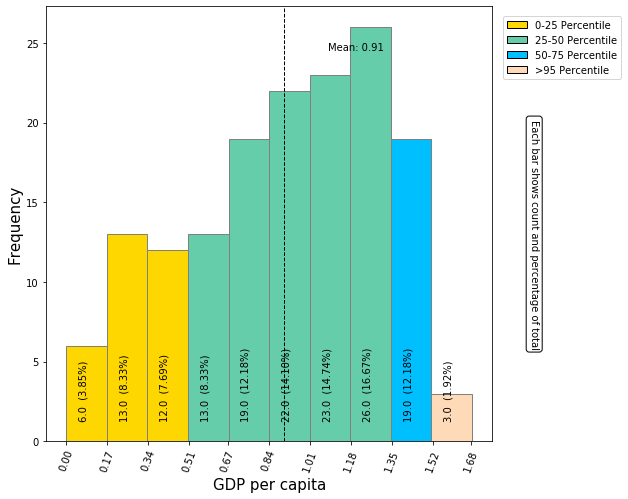

In [29]:
plot_hist_2019('GDP per capita')

- Around 71 countries's economy contribution is above the mean and more countries are one the higher side. Only 3 countries'economies contribute to the extent above 1.50 and 6 countries's economies does not contribute at all,their contribution extent is below 0.17.

In [30]:
df_2019[df_2019['GDP per capita']>1.52]['Country or region']

13    Luxembourg
28         Qatar
33     Singapore
Name: Country or region, dtype: object

- Luxembourg, Qatar and Singapore are the those three countries which contribute to the extent above 1.50.

In [31]:
df_2019[df_2019['GDP per capita']<0.17]['Country or region']

111                     Somalia
113                       Niger
126            Congo (Kinshasa)
140                     Liberia
144                     Burundi
154    Central African Republic
Name: Country or region, dtype: object

- These are those six countries whose GDP per Capita's contribution is less than 0.17.

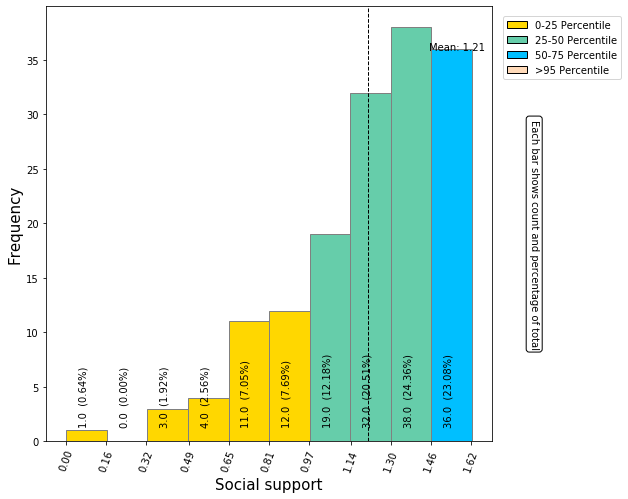

In [32]:
plot_hist_2019('Social support')

- 74 countries exceed the mean value of the extent to which social support factor contributes and only four of them have value below 0.49 for the social support factor.

In [33]:
df_2019[df_2019['Social support']<0.16]['Country or region']

154    Central African Republic
Name: Country or region, dtype: object

In [34]:
df_2019[df_2019['Social support']>1.46]['Country or region']

0               Finland
1               Denmark
2                Norway
3               Iceland
4           Netherlands
5           Switzerland
6                Sweden
7           New Zealand
8                Canada
9               Austria
10            Australia
13           Luxembourg
14       United Kingdom
15              Ireland
17              Belgium
19       Czech Republic
21                Malta
23               France
29                Spain
32              Uruguay
33            Singapore
35                Italy
37             Slovakia
38    Trinidad & Tobago
40           Uzbekistan
41            Lithuania
43             Slovenia
52               Latvia
54              Estonia
55              Jamaica
59           Kazakhstan
62             Paraguay
80              Belarus
82             Mongolia
86         Turkmenistan
96             Bulgaria
Name: Country or region, dtype: object

- Central African Republic's social support contribution is less than 0.16.

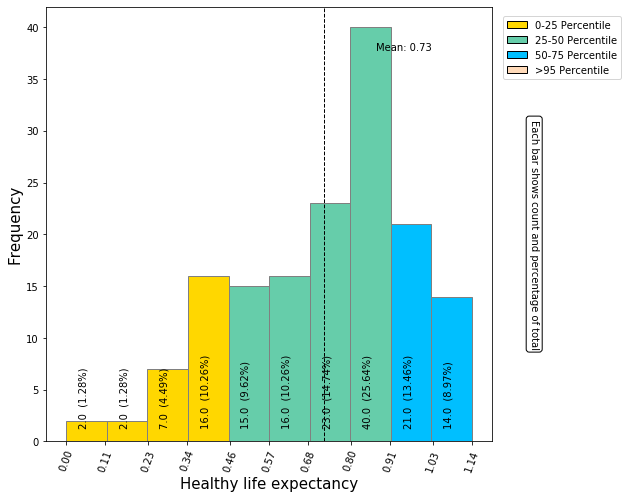

In [35]:
plot_hist_2019('Healthy life expectancy')

- The same can be said about the extent to which Health factor contributes.Around 75 countries exceed the mean value for this feature also but there are 27 countries whose health factor has very low contribution (below 0.46).

In [36]:
df_2019[df_2019['Healthy life expectancy']<0.23]['Country or region']

131                        Chad
134                   Swaziland
143                     Lesotho
154    Central African Republic
Name: Country or region, dtype: object

In [37]:
df_2019[df_2019['Healthy life expectancy']>1.03]['Country or region']

5         Switzerland
8              Canada
10          Australia
23             France
29              Spain
33          Singapore
35              Italy
48             Cyprus
53        South Korea
57              Japan
63    Northern Cyprus
75          Hong Kong
Name: Country or region, dtype: object

- These are 4 countries whose Health factor's contribution is less than 0.23.
- South Korea has high Healthy life expectancy.

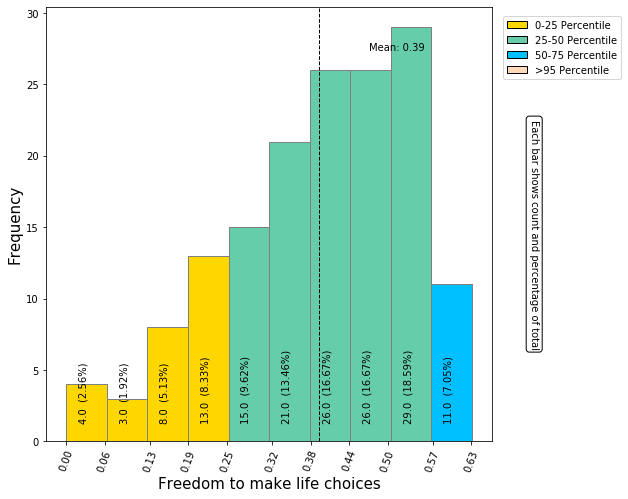

In [38]:
plot_hist_2019('Freedom to make life choices')


- There are 92 countries whose freedom feature contribution is higher than the mean and 28 of them has contribution below 0.25. So, there are more countries on higher side than lower side.

In [39]:
df_2019[df_2019['Freedom to make life choices']>0.57]['Country or region']

0                   Finland
1                   Denmark
2                    Norway
3                   Iceland
5               Switzerland
6                    Sweden
7               New Zealand
8                    Canada
20     United Arab Emirates
40               Uzbekistan
108                Cambodia
Name: Country or region, dtype: object

- These are those 11 countries whose freedom to make life choices contribution is greater than 0.57 and 6 of them are European.

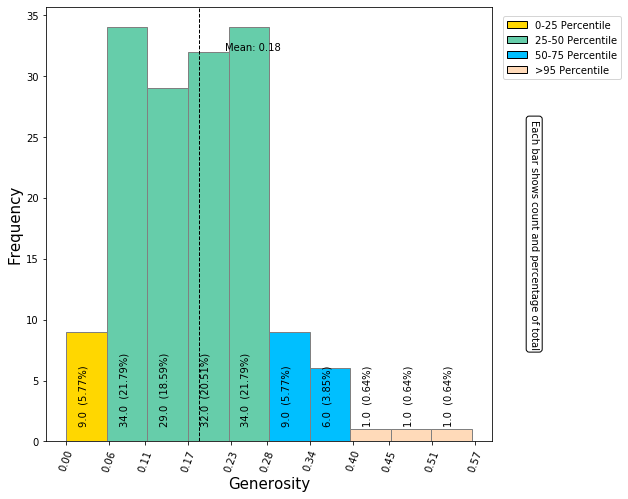

In [40]:
plot_hist_2019('Generosity')


- 74 countries' Generosity factor contributes less than the mean value but more countries are above the mean. Only 3 countries' generosity factor has contribution higher than 0.4 and 9 countries does not contribution is lower than 0.6

In [41]:
df_2019[df_2019['Generosity']>0.40]['Country or region']


91     Indonesia
130      Myanmar
146        Haiti
Name: Country or region, dtype: object

- These three are the top countries whose generosity factor's contribution is greater than 0.40 and two of them are Asian.

In [42]:
df_2019[df_2019['Generosity']<0.06]['Country or region']

19     Czech Republic
41          Lithuania
65           Portugal
81             Greece
88            Morocco
89         Azerbaijan
92              China
103             Gabon
118           Georgia
123           Tunisia
147          Botswana
Name: Country or region, dtype: object

- These are those 11 countries whose generosity factor contributes below 0.6 and China being such an advanced country also falls into this category.

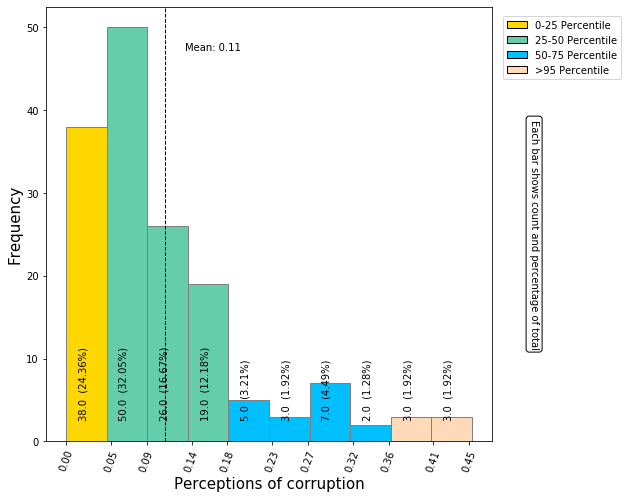

In [43]:
plot_hist_2019('Perceptions of corruption')


In [44]:
df_2019[df_2019['Perceptions of corruption']>0.36]['Country or region']


0          Finland
1          Denmark
6           Sweden
7      New Zealand
33       Singapore
151         Rwanda
Name: Country or region, dtype: object

-These are 6 countries whose corruption factor's contribution is in top 6 (above 0.36) and again 3 of them are European.

In [45]:
df_2019[df_2019['Perceptions of corruption']<0.05]['Country or region']


19               Czech Republic
35                        Italy
37                     Slovakia
38            Trinidad & Tobago
41                    Lithuania
42                     Colombia
45                       Kosovo
47                      Romania
48                       Cyprus
51                     Thailand
55                      Jamaica
61                      Hungary
64                         Peru
65                     Portugal
67                       Russia
69                       Serbia
70                      Moldova
74                      Croatia
77       Bosnia and Herzegovina
79                     Malaysia
81                       Greece
82                     Mongolia
83              North Macedonia
84                      Nigeria
85                   Kyrgyzstan
86                 Turkmenistan
90                      Lebanon
91                    Indonesia
95                     Cameroon
96                     Bulgaria
97                        Ghana
106     

-Russia is a powerful country but its corruption factor's contribution is below 0.05.

### Let's check correlation between happiness score and other variables.

In [46]:
selected_data=df_2019.iloc[:,2:]

In [47]:
selected_data.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [48]:
corr=selected_data.corr()

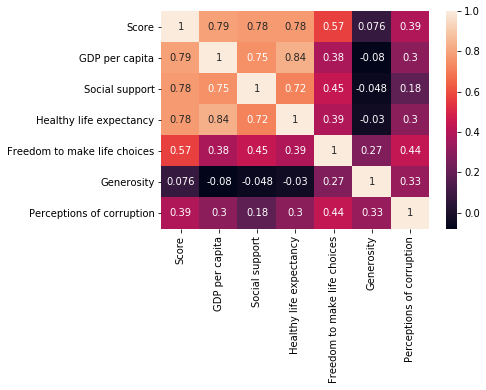

In [49]:
sns.heatmap(corr,annot=True)

- Happiness Score has very high correlation with GDP per capita,Social Support and healthy life expectancy and have very less correlation with Generosity.

- Also,GDP per capita is highly correlated with Healthy life expectancy and Social Support. Perceptions of corruption has highest correlation with Freedom to make life choices.

- Let's plot pairplot to see the realtion between features.

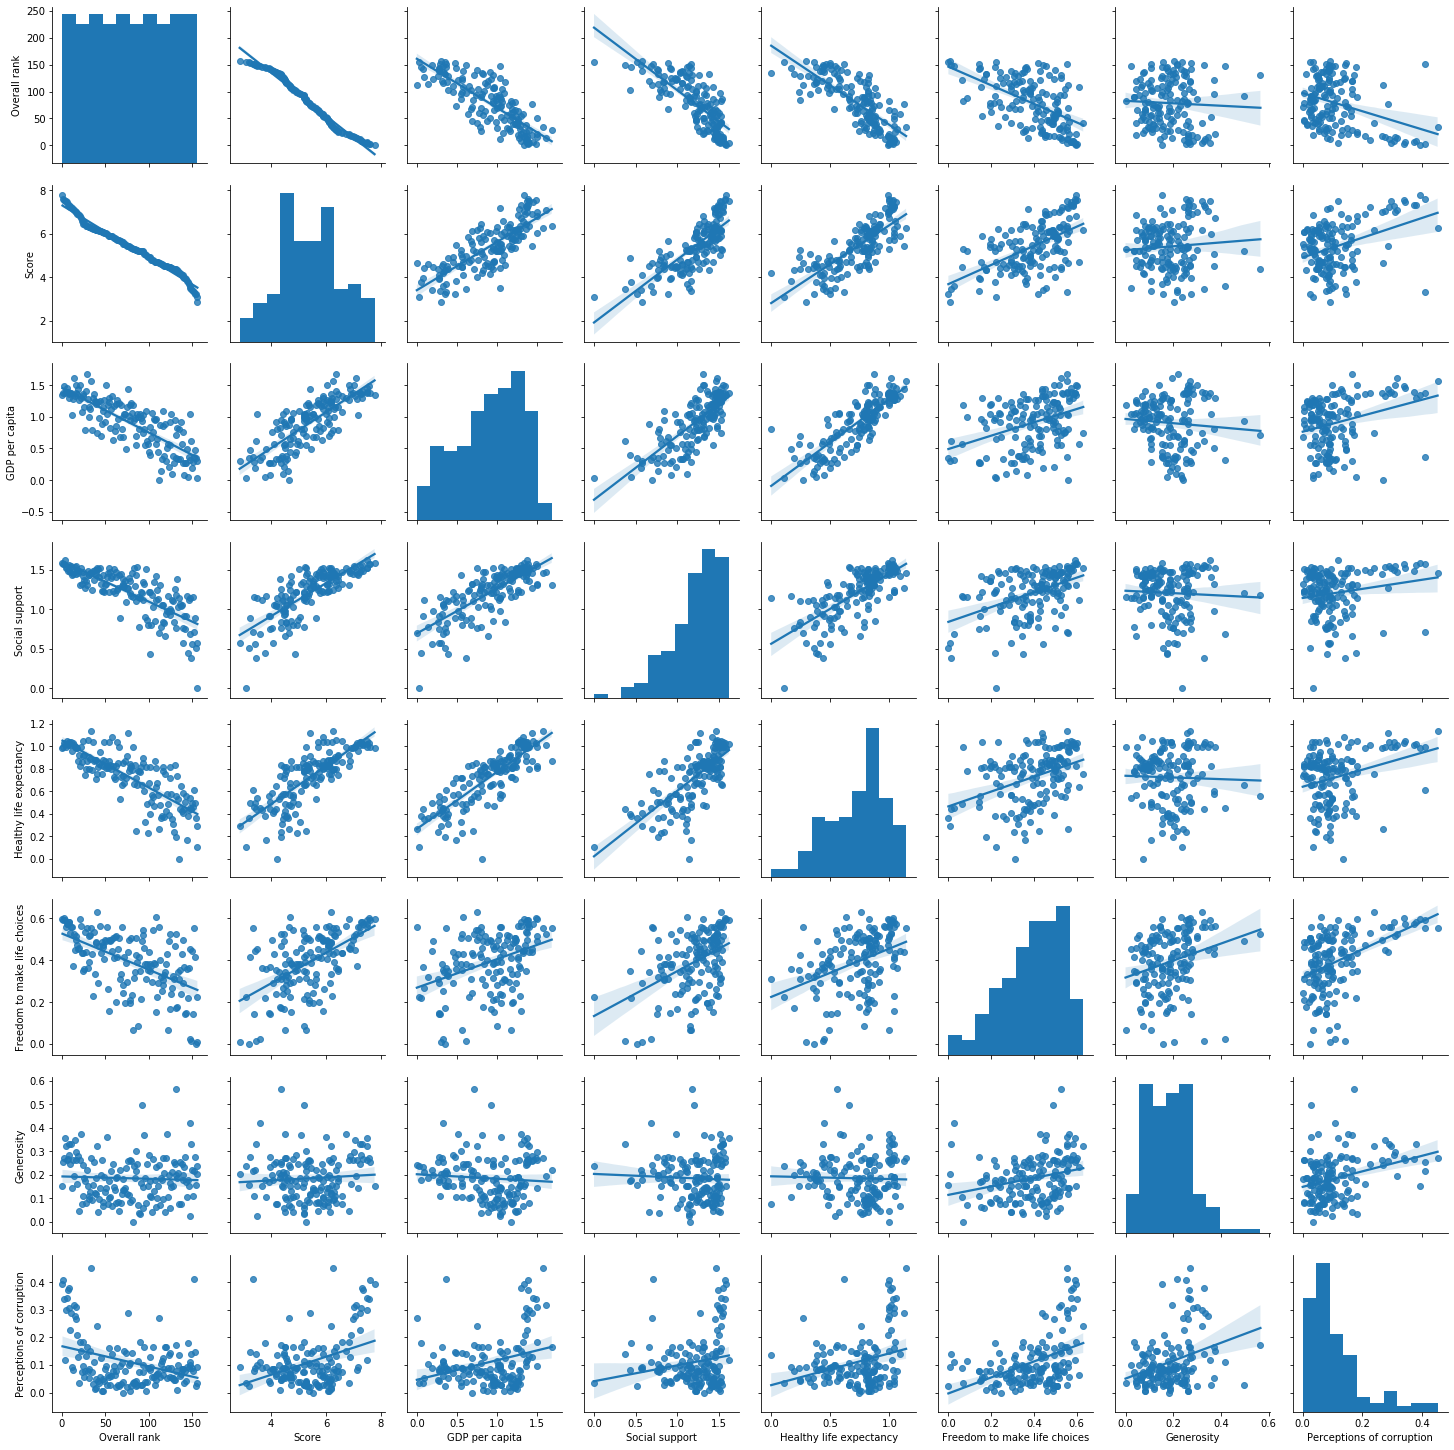

In [50]:
sns.pairplot(df_2019,kind='reg')

-As we can see, that Score clearly has increasing relationship with GDP per capita, Social Support,Healthy Life Expectancy increases but Score has horizontal relationship with Generosity.

-Generosity has increasing relationship with Perceptions of corruption and freedom to make life choices otherwise it has horizontal or no relationship with other features.

-Perceptions of Corruption and Freedom to make life choices have increasing relationship.Even healthy life expectancy has slightly increasing relationship with perceptions of corruption which is quite interesting.

### Top 10 countries for each attribute.

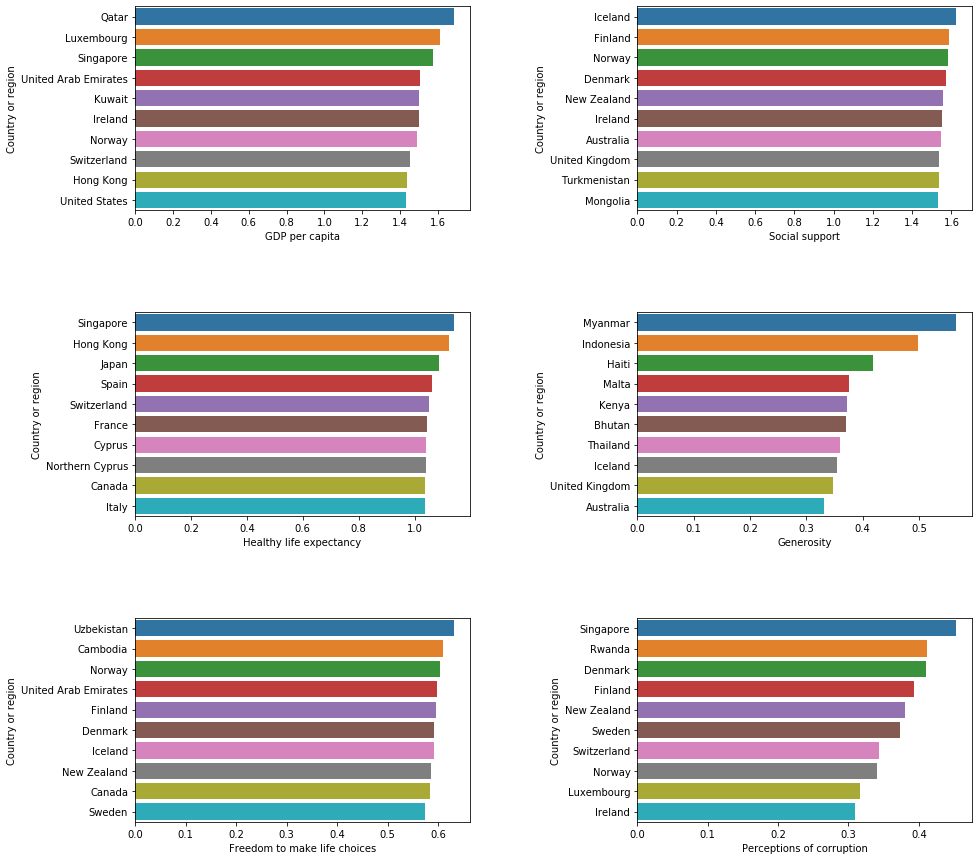

In [51]:
fig,axes= plt.subplots(nrows=3,ncols=2,figsize=(15,15))
fig.subplots_adjust(wspace=0.5,hspace=0.5)
sns.barplot(x='GDP per capita',y='Country or region',data=df_2019.nlargest(10,'GDP per capita'),ax=axes[0,0])
sns.barplot(x='Social support',y='Country or region',data=df_2019.nlargest(10,'Social support'),ax=axes[0,1])
sns.barplot(x='Healthy life expectancy',y='Country or region',data=df_2019.nlargest(10,'Healthy life expectancy'),ax=axes[1,0])
sns.barplot(x='Generosity',y='Country or region',data=df_2019.nlargest(10,'Generosity'),ax=axes[1,1])
sns.barplot(x='Freedom to make life choices',y='Country or region',data=df_2019.nlargest(10,'Freedom to make life choices'),ax=axes[2,0])
sns.barplot(x='Perceptions of corruption',y='Country or region',data=df_2019.nlargest(10,'Perceptions of corruption'),ax=axes[2,1])

- Few points that can be noted here are-

- United States is in top 10 for GDP per capita feature only. It does not appear in top 10 for other features.
- Norway is the only country which is in top 10 in maximum no of features (four features) i.e. in GDP per capita, Perceptions of corruption, Freedom to make life choices and Social support.
- Myanmar,Indonesia,Haiti,Malta,Kenya and Bhutan are not very advance countries but they are among top 10 in Generosity factor.
- 7 out of top 10 countries in perceptions of corruption are European.


Of the top 25 GDP per capita countries, 17 of them are ranked as the top happiest countries. That equates to about 68% of wealthier (per capita) countries being happier. Money can't buy happiness but it helps. If I did resource and population regionalization certain countries may not be as high on the GDP list, but that is left to further research.


Now I want to give a category to each country as High,Mid and Low according to their happiness scores.Thus we have to find out the bound in which these categories shall lie in.

In [52]:
df_2019.loc[df_2019['Country or region']=='South Korea']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
53,54,South Korea,5.895,1.301,1.219,1.036,0.159,0.175,0.056


- South Korea was ranked on 54th on the list, I thought it would make the high category but it's kind of top of low catergory.


In [53]:
df_2019.loc[df_2019['Country or region']=='United States']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.28,0.128


In [54]:
df_2019.loc[df_2019['Country or region']=='United Kingdom']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.45,0.348,0.278


In [55]:
df_2019.loc[df_2019['Country or region']=='Canada']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308


- So all of them belong to the HIGH category and apparently Canada is pretty high upand has a great happiness score.No wonder people are flocking to these countries.

- Lets have a head to head comparison for the above mentioned four countries to understand why they have such a good or a band rank worldwide and get some insight

In [56]:
d= df_2019[(df_2019['Country or region'].isin(['South Korea','Canada','United Kingdom', 'United States']))]
d

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128
53,54,South Korea,5.895,1.301,1.219,1.036,0.159,0.175,0.056


#### Social Support vs GDP per capita vs Healthy life expectancy

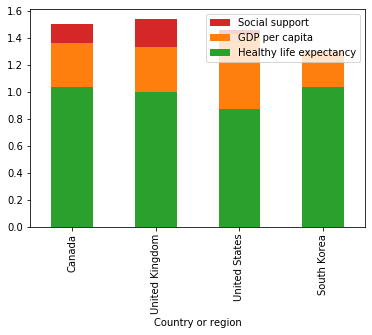

In [57]:
ax = d.plot(y="Social support", x="Country or region", kind="bar",color='C3')
d.plot(y="GDP per capita", x="Country or region", kind="bar", ax=ax, color="C1")
d.plot(y="Healthy life expectancy", x="Country or region", kind="bar", ax=ax, color="C2")

plt.show()

### Freedom to make life choices vs Generosity vs Corruption

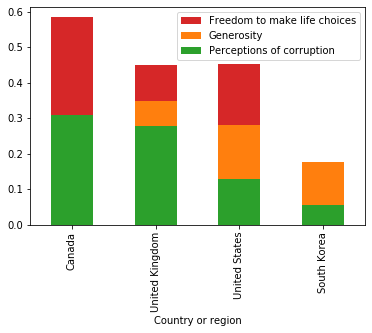

In [58]:
ax = d.plot(y="Freedom to make life choices", x="Country or region", kind="bar",color='C3')
d.plot(y="Generosity", x="Country or region", kind="bar", ax=ax, color="C1",)
d.plot(y="Perceptions of corruption", x="Country or region", kind="bar", ax=ax, color="C2",)

plt.show()




- Lets consider Economy(monetary),Social Support(family) and Health as primary concerns for an individual residing in a country i.e overall wellbeing.Lets see how these distributions are altering over the years or are staying stagnant.



# Clustering of Countries
- We will use various clustering techniques on the world happiness data. Below are the various clustering techniques we will use.

- We are considering eight variables: happiness score, GDP per capita, family, life expectancy, freedom, generosity, corruption and Dystopia residual for clustering the countries. Because clustering is sensitive to data ranges, it is desirable to resize the data before proceeding.

## k-means clustering


- In general, the k-means are the first choice for clustering because of simplicity. Here the user must define the number of clusters. The cluster is formed based on its proximity to the central value of the cluster. The initial center value is selected randomly. K-means clustering is a top-down approach, in a sense determining the number of clusters (k) and then grouping data points into a k cluster.

In [59]:
# Lets drop country of region for elbow curve. 
df_2019_kmeans=df_2019.drop(columns='Country or region', axis=1)
df_2019_kmeans.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### Elbow Curve

In [60]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df_2019_kmeans) 
    kmeanModel.fit(df_2019_kmeans)     
      
    distortions.append(sum(np.min(cdist(df_2019_kmeans, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df_2019_kmeans.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df_2019_kmeans, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df_2019_kmeans.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


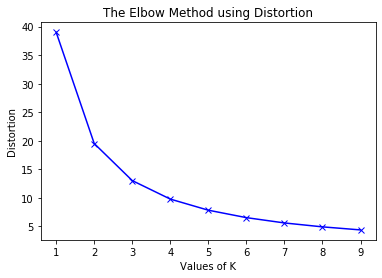

In [61]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

- elbow method is a heuristic used in determining the number of clusters in a data set. Now we will compare values of 2,3 and 4 .

###### n_clusters=2

In [62]:
k_means = KMeans(n_clusters=2, random_state=123)
cluster_labels = k_means.fit(df_2019[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]).labels_
# Append labels from cluster back onto DataFrame for analysis
df_2019['cluster_labels'] = cluster_labels
%timeit k_means.fit(df_2019[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']])


23 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
df_2019.groupby('cluster_labels')[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].mean()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
cluster_labels,,,,,,,
0,6.239518,1.168353,1.400812,0.886729,0.442824,0.182000,0.126835
1,4.410535,0.590042,0.978958,0.531915,0.332408,0.188254,0.091169


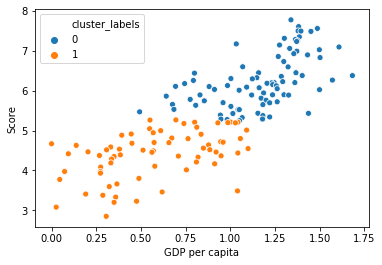

In [64]:
sns.scatterplot(x = df_2019['GDP per capita'], y= df_2019['Score'], hue=df_2019['cluster_labels'])

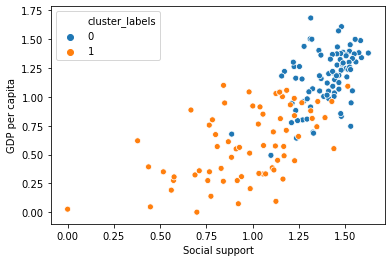

In [65]:
sns.scatterplot(x = df_2019['Social support'], y= df_2019['GDP per capita'], hue=df_2019['cluster_labels'])

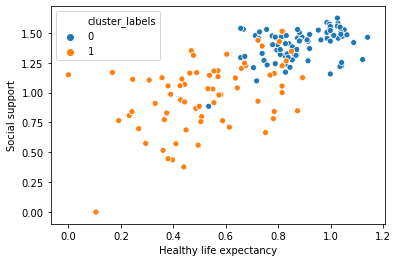

In [66]:
sns.scatterplot(x = df_2019['Healthy life expectancy'], y= df_2019['Social support'], hue=df_2019['cluster_labels'])

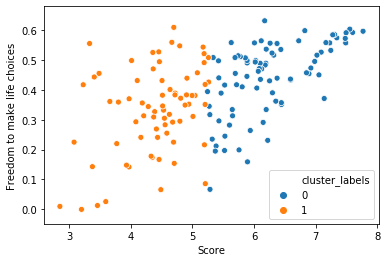

In [67]:
sns.scatterplot(x = df_2019['Score'], y= df_2019['Freedom to make life choices'], hue=df_2019['cluster_labels'])

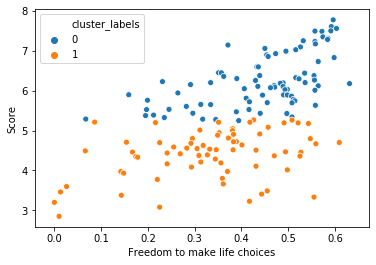

In [68]:
sns.scatterplot(x = df_2019['Freedom to make life choices'], y= df_2019['Score'], hue=df_2019['cluster_labels'])

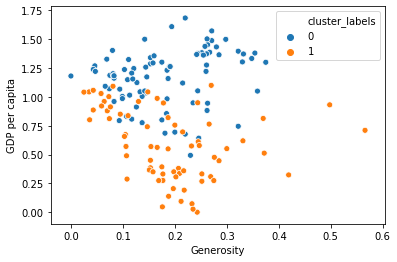

In [69]:
sns.scatterplot(x = df_2019['Generosity'], y= df_2019['GDP per capita'], hue=df_2019['cluster_labels'])

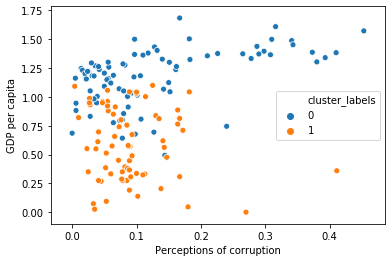

In [70]:
sns.scatterplot(x = df_2019['Perceptions of corruption'], y= df_2019['GDP per capita'], hue=df_2019['cluster_labels'])

#### n_clusters=3

In [71]:
k_means = KMeans(n_clusters=3, random_state=123)
cluster_labels = k_means.fit(df_2019[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]).labels_
# Append labels from cluster back onto DataFrame for analysis
df_2019['cluster_labels'] = cluster_labels
%timeit k_means.fit(df_2019[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']])


27.1 ms ± 605 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [72]:
df_2019.groupby('cluster_labels')[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].mean()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
cluster_labels,,,,,,,
0,5.706910,1.025970,1.332373,0.816672,0.403836,0.157000,0.074254
1,4.258322,0.531695,0.930695,0.491678,0.320169,0.191136,0.093356
2,6.996767,1.369767,1.479833,0.980400,0.509800,0.234667,0.225700


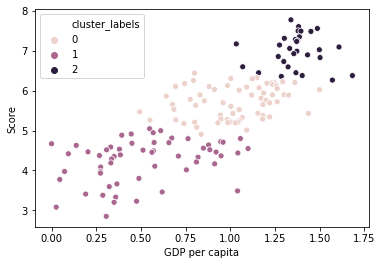

In [73]:
sns.scatterplot(x = df_2019['GDP per capita'], y= df_2019['Score'], hue=df_2019['cluster_labels'])

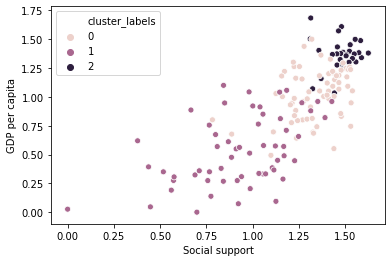

In [74]:
sns.scatterplot(x = df_2019['Social support'], y= df_2019['GDP per capita'], hue=df_2019['cluster_labels'])

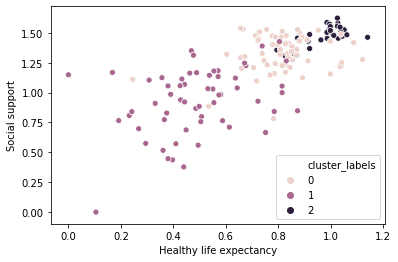

In [75]:
sns.scatterplot(x = df_2019['Healthy life expectancy'], y= df_2019['Social support'], hue=df_2019['cluster_labels'])

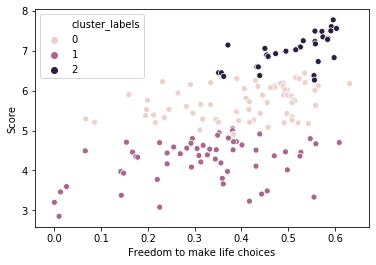

In [76]:
sns.scatterplot(x = df_2019['Freedom to make life choices'], y= df_2019['Score'], hue=df_2019['cluster_labels'])

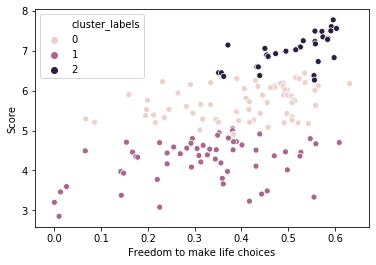

In [77]:
sns.scatterplot(x = df_2019['Freedom to make life choices'], y= df_2019['Score'], hue=df_2019['cluster_labels'])

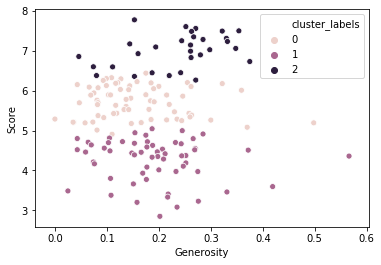

In [78]:
sns.scatterplot(x = df_2019['Generosity'], y= df_2019['Score'], hue=df_2019['cluster_labels'])

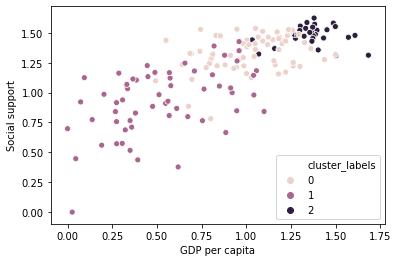

In [79]:
sns.scatterplot(x = df_2019['GDP per capita'], y= df_2019['Social support'], hue=df_2019['cluster_labels'])

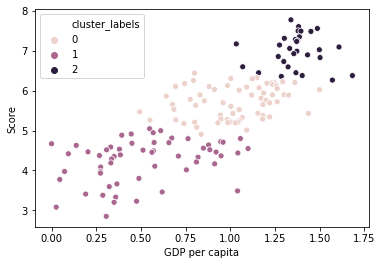

In [80]:
sns.scatterplot(x = df_2019['GDP per capita'], y= df_2019['Score'], hue=df_2019['cluster_labels'])

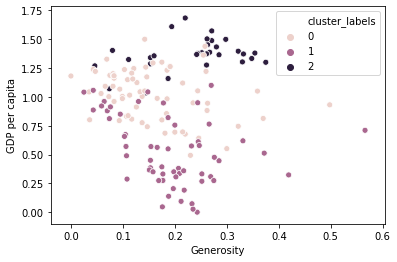

In [81]:
sns.scatterplot(x = df_2019['Generosity'], y= df_2019['GDP per capita'], hue=df_2019['cluster_labels'])

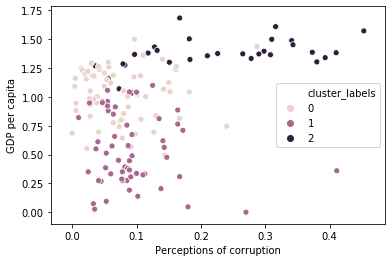

In [82]:
sns.scatterplot(x = df_2019['Perceptions of corruption'], y= df_2019['GDP per capita'], hue=df_2019['cluster_labels'])

### n_clusters=4

In [83]:
k_means = KMeans(n_clusters=4, random_state=123)
cluster_labels = k_means.fit(df_2019[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]).labels_
# Append labels from cluster back onto DataFrame for analysis
df_2019['cluster_labels'] = cluster_labels
%timeit k_means.fit(df_2019[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']])


29.2 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [84]:
df_2019.groupby('cluster_labels')[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].mean()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
cluster_labels,,,,,,,
0,5.744476,1.041159,1.346508,0.829698,0.402746,0.155365,0.072397
1,6.996767,1.369767,1.479833,0.980400,0.509800,0.234667,0.225700
2,4.596848,0.624826,1.018065,0.528304,0.356391,0.185457,0.089065
3,3.543941,0.339706,0.736412,0.420765,0.245882,0.204529,0.107353


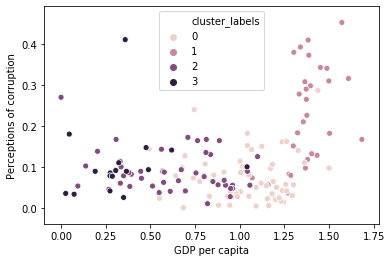

In [85]:
sns.scatterplot(x = df_2019['GDP per capita'], y= df_2019['Perceptions of corruption'], hue=df_2019['cluster_labels'])

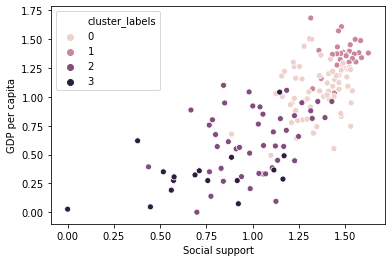

In [86]:
sns.scatterplot(x = df_2019['Social support'], y= df_2019['GDP per capita'], hue=df_2019['cluster_labels'])

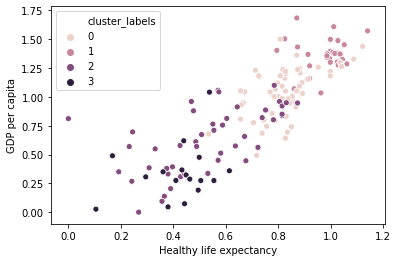

In [87]:
sns.scatterplot(x = df_2019['Healthy life expectancy'], y= df_2019['GDP per capita'], hue=df_2019['cluster_labels'])

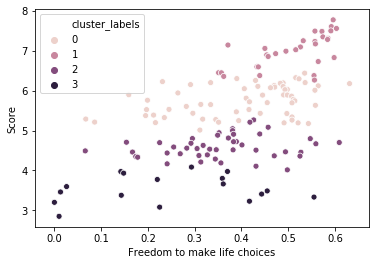

In [88]:
sns.scatterplot(x = df_2019['Freedom to make life choices'], y= df_2019['Score'], hue=df_2019['cluster_labels'])

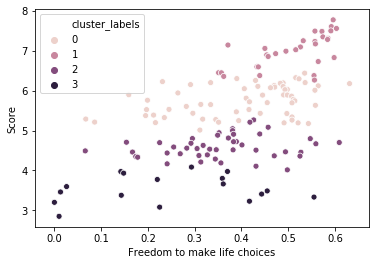

In [89]:
sns.scatterplot(x = df_2019['Freedom to make life choices'], y= df_2019['Score'], hue=df_2019['cluster_labels'])

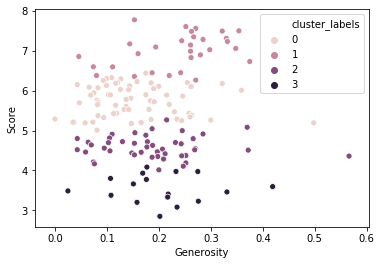

In [90]:
sns.scatterplot(x = df_2019['Generosity'], y= df_2019['Score'], hue=df_2019['cluster_labels'])

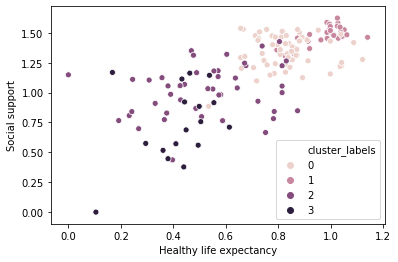

In [91]:
sns.scatterplot(x = df_2019['Healthy life expectancy'], y= df_2019['Social support'], hue=df_2019['cluster_labels'])

K means is really working well and we can determine number of cluster K is 3 is the best.

-  Now, let's try MiniBatchKMeans for comparison:

In [92]:
mini_batch_k_means = MiniBatchKMeans(n_clusters=3, random_state=123)
cluster_labels1 = k_means.fit(df_2019[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]).labels_
# Append labels from cluster back onto DataFrame for analysis
df_2019['cluster_labels1'] = cluster_labels1

%timeit mini_batch_k_means.fit(df_2019[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']])

16.2 ms ± 225 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [93]:
df_2019.groupby('cluster_labels1')[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].mean()


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
cluster_labels1,,,,,,,
0,5.744476,1.041159,1.346508,0.829698,0.402746,0.155365,0.072397
1,6.996767,1.369767,1.479833,0.980400,0.509800,0.234667,0.225700
2,4.596848,0.624826,1.018065,0.528304,0.356391,0.185457,0.089065
3,3.543941,0.339706,0.736412,0.420765,0.245882,0.204529,0.107353


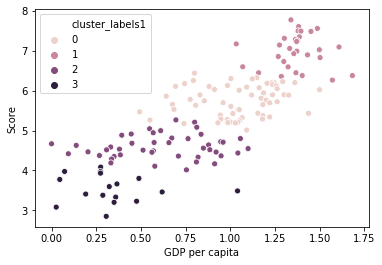

In [94]:
sns.scatterplot(x = df_2019['GDP per capita'], y= df_2019['Score'], hue=df_2019['cluster_labels1'])

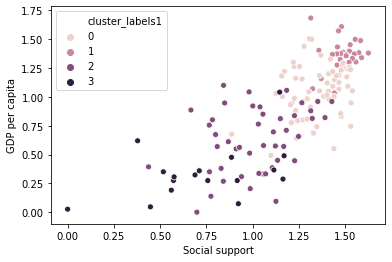

In [95]:
sns.scatterplot(x = df_2019['Social support'], y= df_2019['GDP per capita'], hue=df_2019['cluster_labels1'])


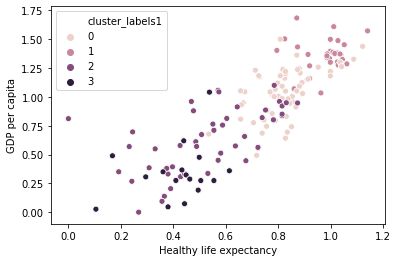

In [96]:
sns.scatterplot(x = df_2019['Healthy life expectancy'], y= df_2019['GDP per capita'], hue=df_2019['cluster_labels1'])

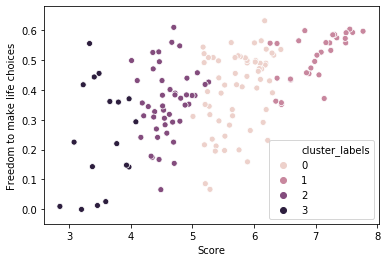

In [97]:
sns.scatterplot(x = df_2019['Score'], y= df_2019['Freedom to make life choices'], hue=df_2019['cluster_labels'])

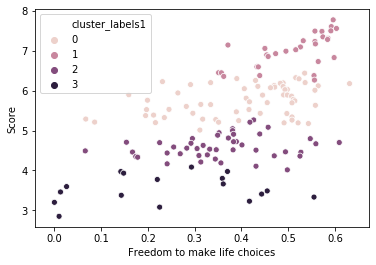

In [98]:
sns.scatterplot(x = df_2019['Freedom to make life choices'], y= df_2019['Score'], hue=df_2019['cluster_labels1'])


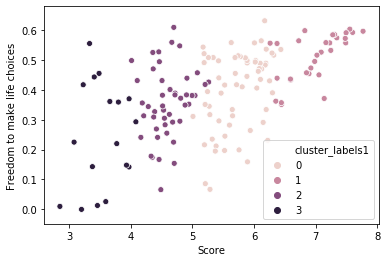

In [99]:
sns.scatterplot(x = df_2019['Score'], y= df_2019['Freedom to make life choices'], hue=df_2019['cluster_labels1'])

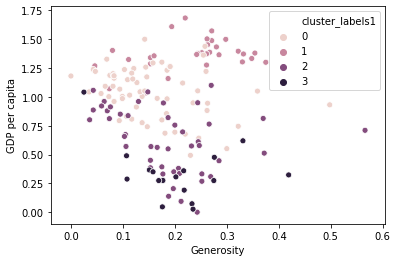

In [100]:
sns.scatterplot(x = df_2019['Generosity'], y= df_2019['GDP per capita'], hue=df_2019['cluster_labels1'])

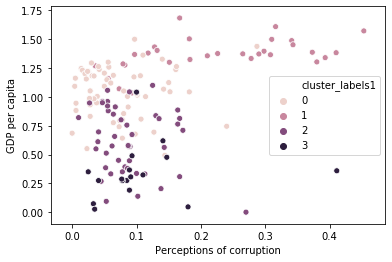

In [101]:
sns.scatterplot(x = df_2019['Perceptions of corruption'], y= df_2019['GDP per capita'], hue=df_2019['cluster_labels1'])

- Mini-batch k-means produced similar results but it was more than twice as fast as  K means

-Let's visualize the predictions and the true labels of the observations. To plot in two-dimensional space, we need to reduce our data dimensionality. For this purpose, we apply PCA and use the first two principal components.

In [102]:
features = ['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
X = df_2019[features]


scaler = StandardScaler()
X_std = scaler.fit_transform(X)

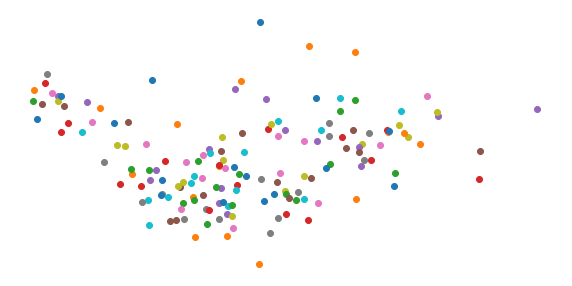

In [103]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_std)

plt.figure(figsize=(10,5))

for i in range(pca_components.shape[0]):
    plt.scatter(pca_components[i, 0], pca_components[i, 1])
             

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [104]:
print(pca_components.shape[0])

156


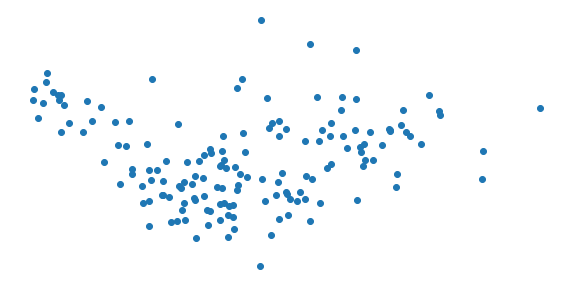

In [105]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

- When we don't have existing labels: similarity

A good cluster is made up of datapoints that are more similar to one another than they are to datapoints in other clusters. One way of computing similarity is the silhouette coefficient.

### silhouette coefficient.

In [106]:
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.3241302438547712


In [107]:
labels = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.3391003669055415


In [108]:
labels = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.26201852625594074



## Hierarchical clustering
- It does not require the number of cluster to be estimated and provided before starting the algorithm. It makes no assumption regarding the internal structure of the data points. For further details on clustering,

- Let’s draw the dendrogram(A dendrogram is a tree-like diagram that records the sequences of merges or splits)to help us decide the number of clusters for the problem

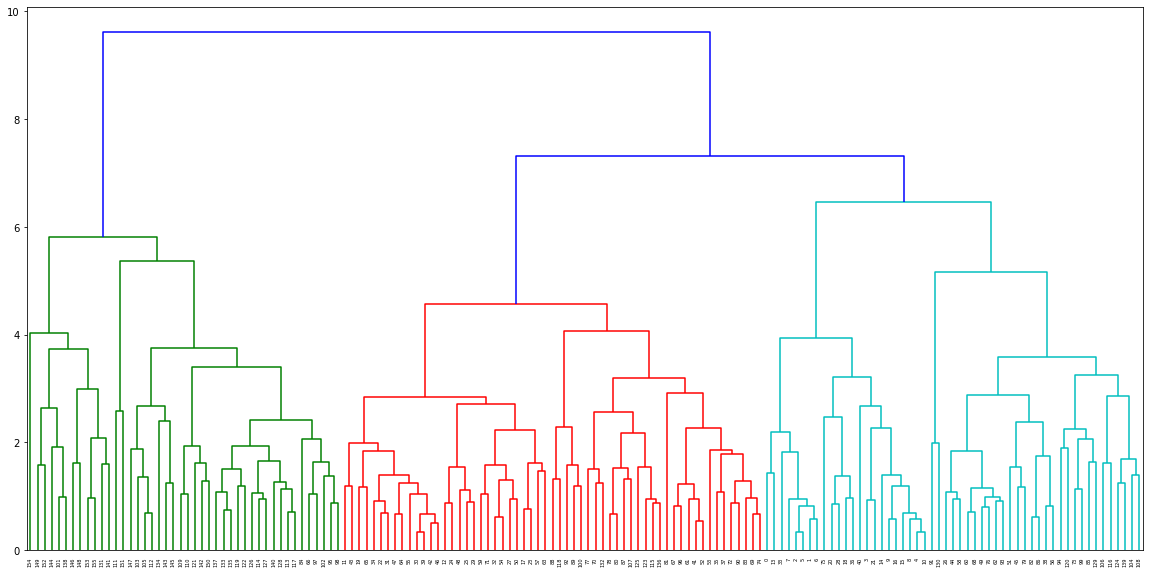

In [109]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

- By investigating this dendrogram, I can try to choose the number of clusters 3 that match most to our  needs.

## DBSAN

In [110]:
dbscan_cluster = DBSCAN(eps=0.2, min_samples=4)
dbscan_labels =dbscan_cluster.fit(df_2019[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]).labels_
df_2019['dbscan_labels'] = dbscan_labels



In [111]:
df_2019.groupby('dbscan_labels')[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].mean()


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
dbscan_labels,,,,,,,
-1,5.174222,0.838556,1.162896,0.687733,0.372185,0.178815,0.092704
0,7.391556,1.391333,1.530556,1.022333,0.572889,0.285111,0.329889
1,7.014600,1.434000,1.505600,0.996000,0.492000,0.252200,0.275800
2,6.198571,1.186571,1.468714,0.873286,0.482857,0.124143,0.055857


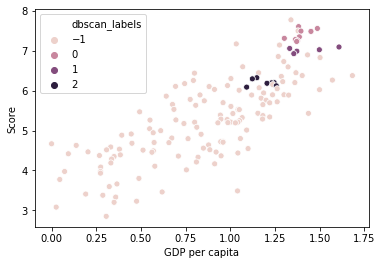

In [112]:
sns.scatterplot(x = df_2019['GDP per capita'], y= df_2019['Score'], hue=df_2019['dbscan_labels'])

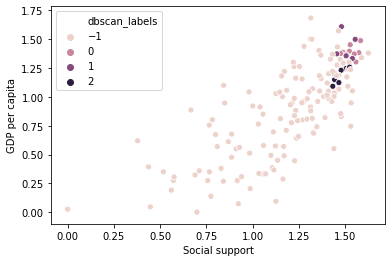

In [113]:
sns.scatterplot(x = df_2019['Social support'], y= df_2019['GDP per capita'], hue=df_2019['dbscan_labels'])

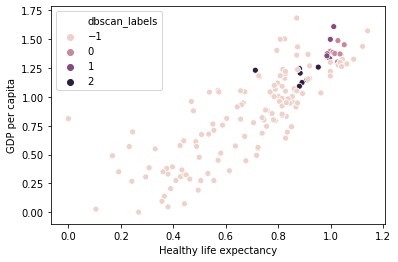

In [114]:
sns.scatterplot(x = df_2019['Healthy life expectancy'], y= df_2019['GDP per capita'], hue=df_2019['dbscan_labels'])

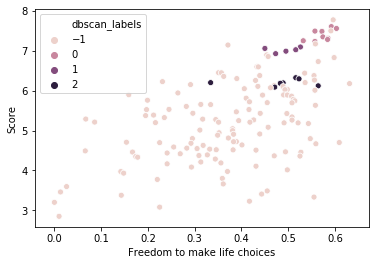

In [115]:
sns.scatterplot(x = df_2019['Freedom to make life choices'], y= df_2019['Score'], hue=df_2019['dbscan_labels'])

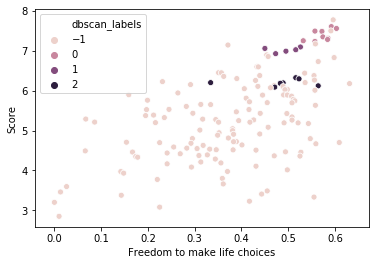

In [116]:
sns.scatterplot(x = df_2019['Freedom to make life choices'], y= df_2019['Score'], hue=df_2019['dbscan_labels'])

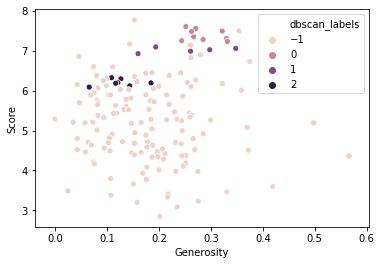

In [117]:
sns.scatterplot(x = df_2019['Generosity'], y= df_2019['Score'], hue=df_2019['dbscan_labels'])

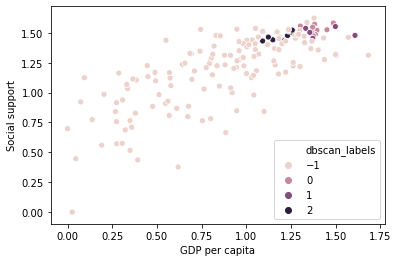

In [118]:
sns.scatterplot(x = df_2019['GDP per capita'], y= df_2019['Social support'], hue=df_2019['dbscan_labels'])

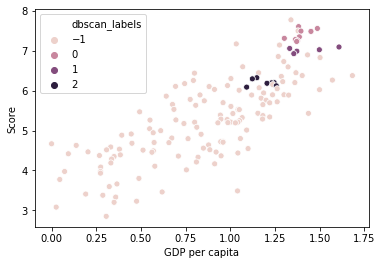

In [119]:
sns.scatterplot(x = df_2019['GDP per capita'], y= df_2019['Score'], hue=df_2019['dbscan_labels'])

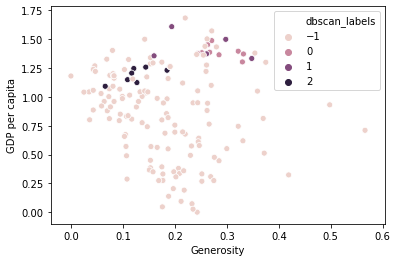

In [120]:
sns.scatterplot(x = df_2019['Generosity'], y= df_2019['GDP per capita'], hue=df_2019['dbscan_labels'])

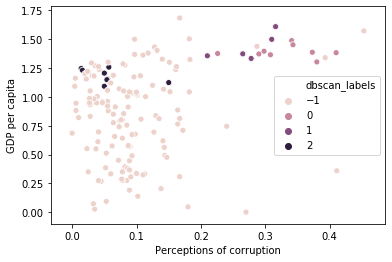

In [121]:
sns.scatterplot(x = df_2019['Perceptions of corruption'], y= df_2019['GDP per capita'], hue=df_2019['dbscan_labels'])

In [122]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

NameError: name 'clusters' is not defined

# GMM

In [ ]:
gmm_cluster = GaussianMixture(n_components=3, random_state=123)
gmm_labels =dbscan_cluster.fit(df_2019[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]).labels_
df_2019['gmm_labels'] = gmm_labels


In [ ]:
df_2019.groupby('gmm_labels')[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].mean()


In [ ]:
sns.scatterplot(x = df_2019['GDP per capita'], y= df_2019['Score'], hue=df_2019['gmm_labels'])

In [ ]:
sns.scatterplot(x = df_2019['Social support'], y= df_2019['GDP per capita'], hue=df_2019['gmm_labels'])

In [ ]:
sns.scatterplot(x = df_2019['Healthy life expectancy'], y= df_2019['GDP per capita'], hue=df_2019['gmm_labels'])

In [ ]:
sns.scatterplot(x = df_2019['Freedom to make life choices'], y= df_2019['Score'], hue=df_2019['gmm_labels'])

In [ ]:
sns.scatterplot(x = df_2019['Freedom to make life choices'], y= df_2019['Score'], hue=df_2019['gmm_labels'])

In [ ]:
sns.scatterplot(x = df_2019['Generosity'], y= df_2019['Score'], hue=df_2019['gmm_labels'])

In [ ]:
sns.scatterplot(x = df_2019['GDP per capita'], y= df_2019['Social support'], hue=df_2019['gmm_labels'])

In [ ]:
sns.scatterplot(x = df_2019['GDP per capita'], y= df_2019['Score'], hue=df_2019['gmm_labels'])

In [ ]:
sns.scatterplot(x = df_2019['Generosity'], y= df_2019['GDP per capita'], hue=df_2019['gmm_labels'])

- As we see that Gmm is not really clustering as well.

In [ ]:
#print("Adjusted Rand Index of the GMM solution: {}"
 #     .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

## PCA

In [ ]:
# We just want the first two principal components
pca = PCA(n_components=3)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_std)

In [ ]:
plt.figure(figsize=(10,5))

for i in range(pca_components.shape[0]):
    plt.scatter(pca_components[i, 0], pca_components[i, 1])
             

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## t-SNE

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.000s...
[t-SNE] Computed neighbors for 156 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 0.553529
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.448410
[t-SNE] KL divergence after 300 iterations: 0.124550


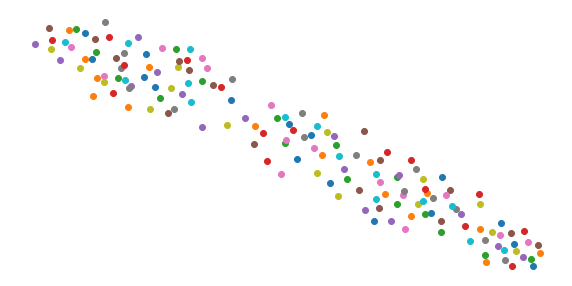

In [123]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results.shape[0]):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 155 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.000s...
[t-SNE] Computed neighbors for 156 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 1.106760
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.562798
[t-SNE] KL divergence after 300 iterations: 0.015347


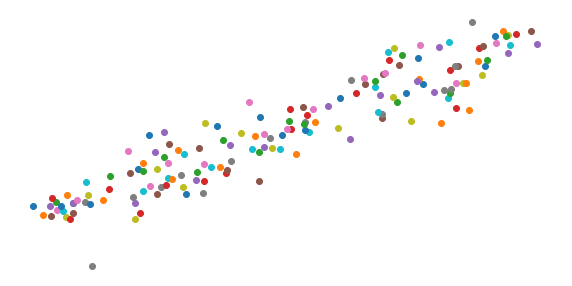

In [124]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results.shape[0]):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 155 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.001s...
[t-SNE] Computed neighbors for 156 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 1.106760
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.343681
[t-SNE] KL divergence after 300 iterations: 0.016617


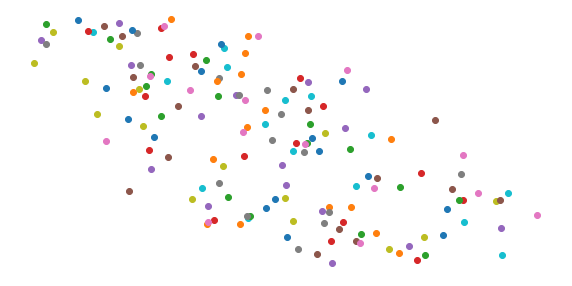

In [125]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results.shape[0]):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 155 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.000s...
[t-SNE] Computed neighbors for 156 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.622604
[t-SNE] KL divergence after 300 iterations: 0.000438


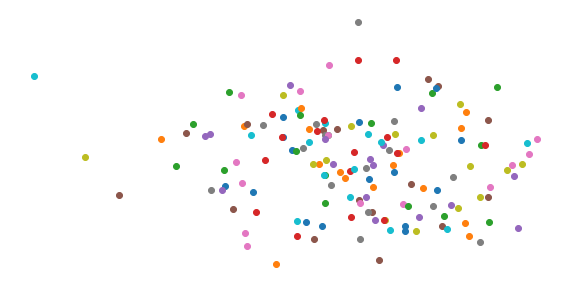

In [126]:
tsne = TSNE(n_components=2, verbose=1, perplexity=200, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results.shape[0]):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 155 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.000s...
[t-SNE] Computed neighbors for 156 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 2.981552
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.995907
[t-SNE] KL divergence after 500 iterations: 0.000420


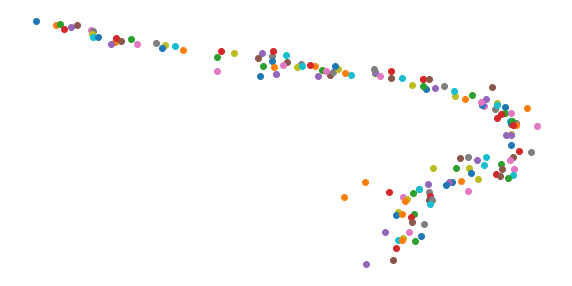

In [127]:
#SELECTED METHOD

tsne_selected = TSNE(n_components=2, verbose=1, perplexity=150, n_iter=500)
tsne_results_selected = tsne_selected.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results_selected.shape[0]):
    plt.scatter(tsne_results_selected[i, 0], tsne_results_selected[i, 1]
             
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.000s...
[t-SNE] Computed neighbors for 156 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 0.347493
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.094738
[t-SNE] KL divergence after 300 iterations: 0.263383


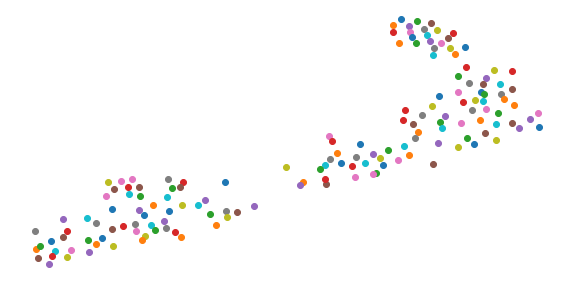

In [128]:
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results.shape[0]):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1]
             
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.000s...
[t-SNE] Computed neighbors for 156 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 0.347493
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.786476
[t-SNE] KL divergence after 500 iterations: 0.269422


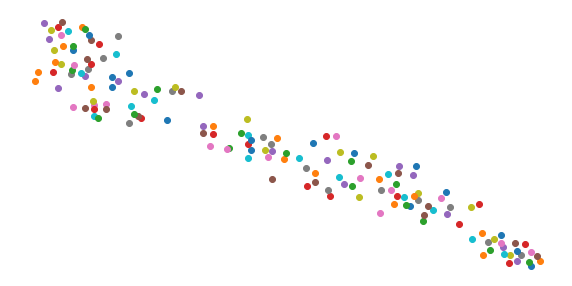

In [129]:
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=500)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results.shape[0]):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1]
             
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 156 samples in 0.000s...
[t-SNE] Computed neighbors for 156 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 156 / 156
[t-SNE] Mean sigma: 0.427118
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.409943
[t-SNE] KL divergence after 300 iterations: 0.191196


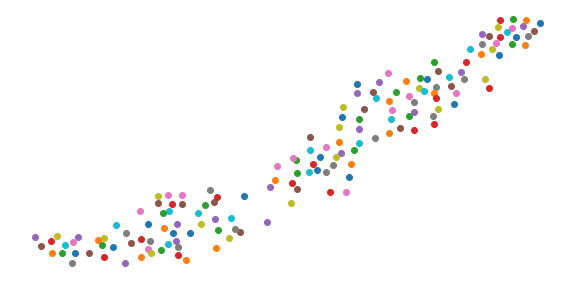

In [130]:
tsne = TSNE(n_components=2, verbose=1, perplexity=35, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(tsne_results.shape[0]):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1]
             
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')

plt.show()

In [ ]:
labels = KMeans(n_clusters=3 ,random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

So here TSNE is not really clustering well at all in this dataset

## UMAP

In [ ]:
umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(umap_results.shape[0]):
    plt.scatter(umap_results[i, 0], umap_results[i, 1]
             
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(umap_results.shape[0]):
    plt.scatter(umap_results[i, 0], umap_results[i, 1]
             
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))

for i in range(umap_results.shape[0]):
    plt.scatter(umap_results[i, 0], umap_results[i, 1]
             
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


Umap is a little bit better clustering with (n_neighbors=5, min_dist=0.1 and n_neighbors=3,min_dist=0.1)

## The K-means clusters were the most useful for the intended purpose of making recommendations for listings.

This notebook explored the World Happiness Dataset using a total of 7 models:
K-means, Agglomerative Clustering, , DBSCAN, Gaussian Mixture, PCA, t_SNE, UMAP.



For the models which we assigned a group count of 3, K-means, Agglomerative Clustering, and Gaussian Mixture, two diagonal or vertical lines could nearly be drawn between decision boundaries by way of GDP considerations.

In making this determination, I tried 3 cluster models and compared them based on silhouette scores, and visual separation of clusters. Each model was tuned for the most significant hyperparameters, where possible.



The silhouette scores were similar among the KMeans, GMM, and DBSCAN models ranging from 0.30 to 0.32. However, upon plotting the K means clusters compared to the other models, K means proved to have more information for the purpose of comparing listings across the identified clusters for that model